# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
diamonds = pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Projects\Project4\Cleaned_Diamonds.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [30]:
#your code here
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_n,color_n
count,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000
mean,0.797857,61.749389,57.457038,3931.982589,5.731964,5.733890,3.539651,3.051139,3.405815
std,0.473962,1.432475,2.234084,3988.612539,1.119634,1.111753,0.691784,1.647101,1.701170
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.500000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,11.420000,6.980000,7.000000,6.000000


In [38]:
diamonds.loc[diamonds['price']==18823.000000]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_n,color_n
27742,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16,3,1


In [5]:
#your comments here
"""We notice that in the case of PRICE, the Standard Deviation is close to the mean. Indeed, we see the price range is large(18KEUR)
and therefore the variability is affected.
Max carat is 25 times higher than Min carat. Is it what affects the price?
"""

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [6]:
#your hypotheses here
"""
Based on our previous observation, we assume that carat weighs significantly on the price.
We can also assume based on our general knowledge that aesthetic features that may make a diamond more valuable, such as 
COLOR and CLARITY, can also weigh on the price.
"""

'\nOur hypotheses are carat, color, clarity because theses are aesthetic features, and may make it more valuable.\n\n'

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [33]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'clarity_n', 'color_n'],
      dtype='object')

In [34]:
#your code here
color=diamonds[['color','carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x', 'y','z']].groupby('color').agg('mean')
color=color.round(2)
color.reset_index(inplace=True)

In [35]:
color

,color,carat,depth,table,price,x,y,z
0,D,0.66,61.70,57.40,3168.11,5.42,5.42,3.34
1,E,0.66,61.66,57.49,3076.75,5.41,5.42,3.34
2,F,0.74,61.69,57.43,3725.09,5.62,5.62,3.47
3,G,0.77,61.76,57.29,3998.15,5.68,5.68,3.51
4,H,0.91,61.84,57.52,4484.03,5.98,5.98,3.70
5,I,1.03,61.85,57.58,5091.87,6.22,6.22,3.85
6,J,1.16,61.89,57.81,5323.82,6.52,6.52,4.03


**What do you see? Pay special attention to the relationship between price and color.**

In [10]:
#your thoughts here
"""The most expensive diamonds seem to be those with color J (the worst) whereas the cheapest are with color E (second best).
Does it mean that price and colors are negatively correlated?  (i.e. the worse the color, the higher the price)
Or at least independant?"""

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

<AxesSubplot:ylabel='Frequency'>

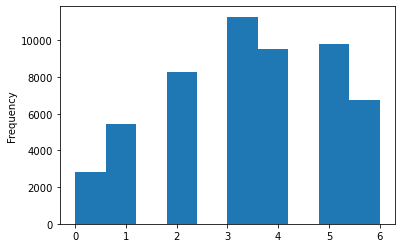

In [13]:
diamonds['color_n'].plot(kind='hist')

In [42]:
#your comments here
"""
The most frequent colors are on the right side of the histogram, which means the high-quality colors are also the most
common.
The worst colors are also the scarcest (color 0 has less than 3000 occurences).
Maybe it could explain why it weighs little on the price.
"""


'\nThe most frequent colors are on the right side of the histogram, which means the high-quality colors are also the most\ncommon.\nThe worst colors are also the scarcest (color 0 has less than 3000 occurences).\nMaybe it could explain why it weighs little on the price.\n'

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [43]:
#your code here
carat=diamonds[['carat','color', 'cut', 'clarity', 'depth', 'table', 'price', 'x', 'y','z']].groupby('carat').agg('mean')
carat=carat.round(2)
carat.reset_index(inplace=True)

In [44]:

carat

,carat,depth,table,price,x,y,z
0,0.20,61.10,59.33,365.17,3.79,3.75,2.30
1,0.21,60.51,58.44,380.22,3.87,3.84,2.33
2,0.22,61.62,60.40,391.40,3.90,3.85,2.39
3,0.23,61.43,58.03,486.14,3.95,3.97,2.43
4,0.24,61.60,57.49,505.19,3.99,4.02,2.47
...,...,...,...,...,...,...,...
268,4.00,63.30,58.00,15984.00,10.01,9.94,6.31
269,4.01,61.75,61.50,15223.00,10.08,10.02,6.20
270,4.13,64.80,61.00,17329.00,10.00,9.85,6.43
271,4.50,65.80,58.00,18531.00,10.23,10.16,6.72


In [ ]:
#your comments
"""
Here we see at first glance that the lowest carats have the cheapest price, whereas the highest carat values at the bottom
of the chart are the most expensive. So it appears like there is a correlation.
"""


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

<AxesSubplot:ylabel='Frequency'>

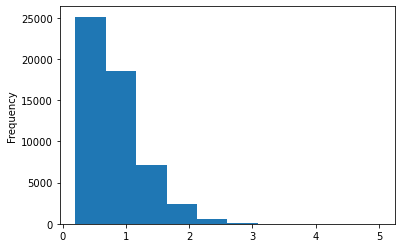

In [45]:
#your code here
diamonds['carat'].plot(kind='hist')

In [ ]:
#your comments
"""
The most frequent diamonds are the lightest ones. The bigger the scarcer.
"""

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [46]:
#your code here
table=diamonds[['table','carat','color', 'cut', 'clarity', 'depth', 'price', 'x', 'y','z']].groupby('table').agg('mean')
table=table.round(2)
table.reset_index(inplace=True)

In [47]:
table

,table,carat,depth,price,x,y,z
0,43.0,1.04,62.90,4997.0,6.45,6.41,4.04
1,44.0,0.29,62.80,474.0,4.20,4.24,2.65
2,49.0,0.65,64.25,2290.5,5.36,5.32,3.42
3,50.0,1.51,61.50,8995.5,7.38,7.30,4.51
4,50.1,0.94,66.00,3353.0,6.13,6.17,4.06
...,...,...,...,...,...,...,...
122,71.0,0.68,58.00,1633.0,5.85,5.70,3.35
123,73.0,0.60,68.90,2406.5,5.52,5.46,3.74
124,76.0,0.79,65.30,2362.0,5.52,5.13,3.35
125,79.0,0.81,68.80,2301.0,5.26,5.20,3.58


In [20]:
#your comments here
"""
Table appears to be irrelevant when discussing the value of the diamond"""

**Finally, do the same with the `clarity` column.**

In [54]:
#your code here
clarity=diamonds[['clarity_n','table','carat','color', 'cut', 'depth', 'price', 'x', 'y','z']].groupby('clarity_n').agg('mean')
clarity=clarity.round(2)
clarity.reset_index(inplace=True)

In [55]:
clarity

,clarity_n,table,carat,depth,price,x,y,z
0,0,58.30,1.28,62.73,3924.17,6.76,6.71,4.22
1,1,57.93,1.08,61.77,5061.49,6.40,6.39,3.95
2,2,57.66,0.85,61.85,3996.00,5.89,5.89,3.64
3,3,57.42,0.76,61.72,3924.17,5.66,5.66,3.49
4,4,57.31,0.73,61.67,3839.14,5.57,5.58,3.44
5,5,57.02,0.60,61.66,3283.74,5.22,5.23,3.22
6,6,56.88,0.50,61.62,2519.51,4.96,4.98,3.06
7,7,56.51,0.51,61.51,2864.84,4.97,4.99,3.06


In [23]:
#your comments here
"""1 is expensive, whereas 7 is lower than the mean.
It doesn't seem to be correlated with price.
However, it appears negatively correlated with size features (carat, table, depth, x,y,z). In other words, 
the heavier, the less clear"""

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [24]:
#your thoughts here
"""Obviously the carat seems to be the predominant feature. 
Our hypotheses about aesthetic features are proven wrong.
"""

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


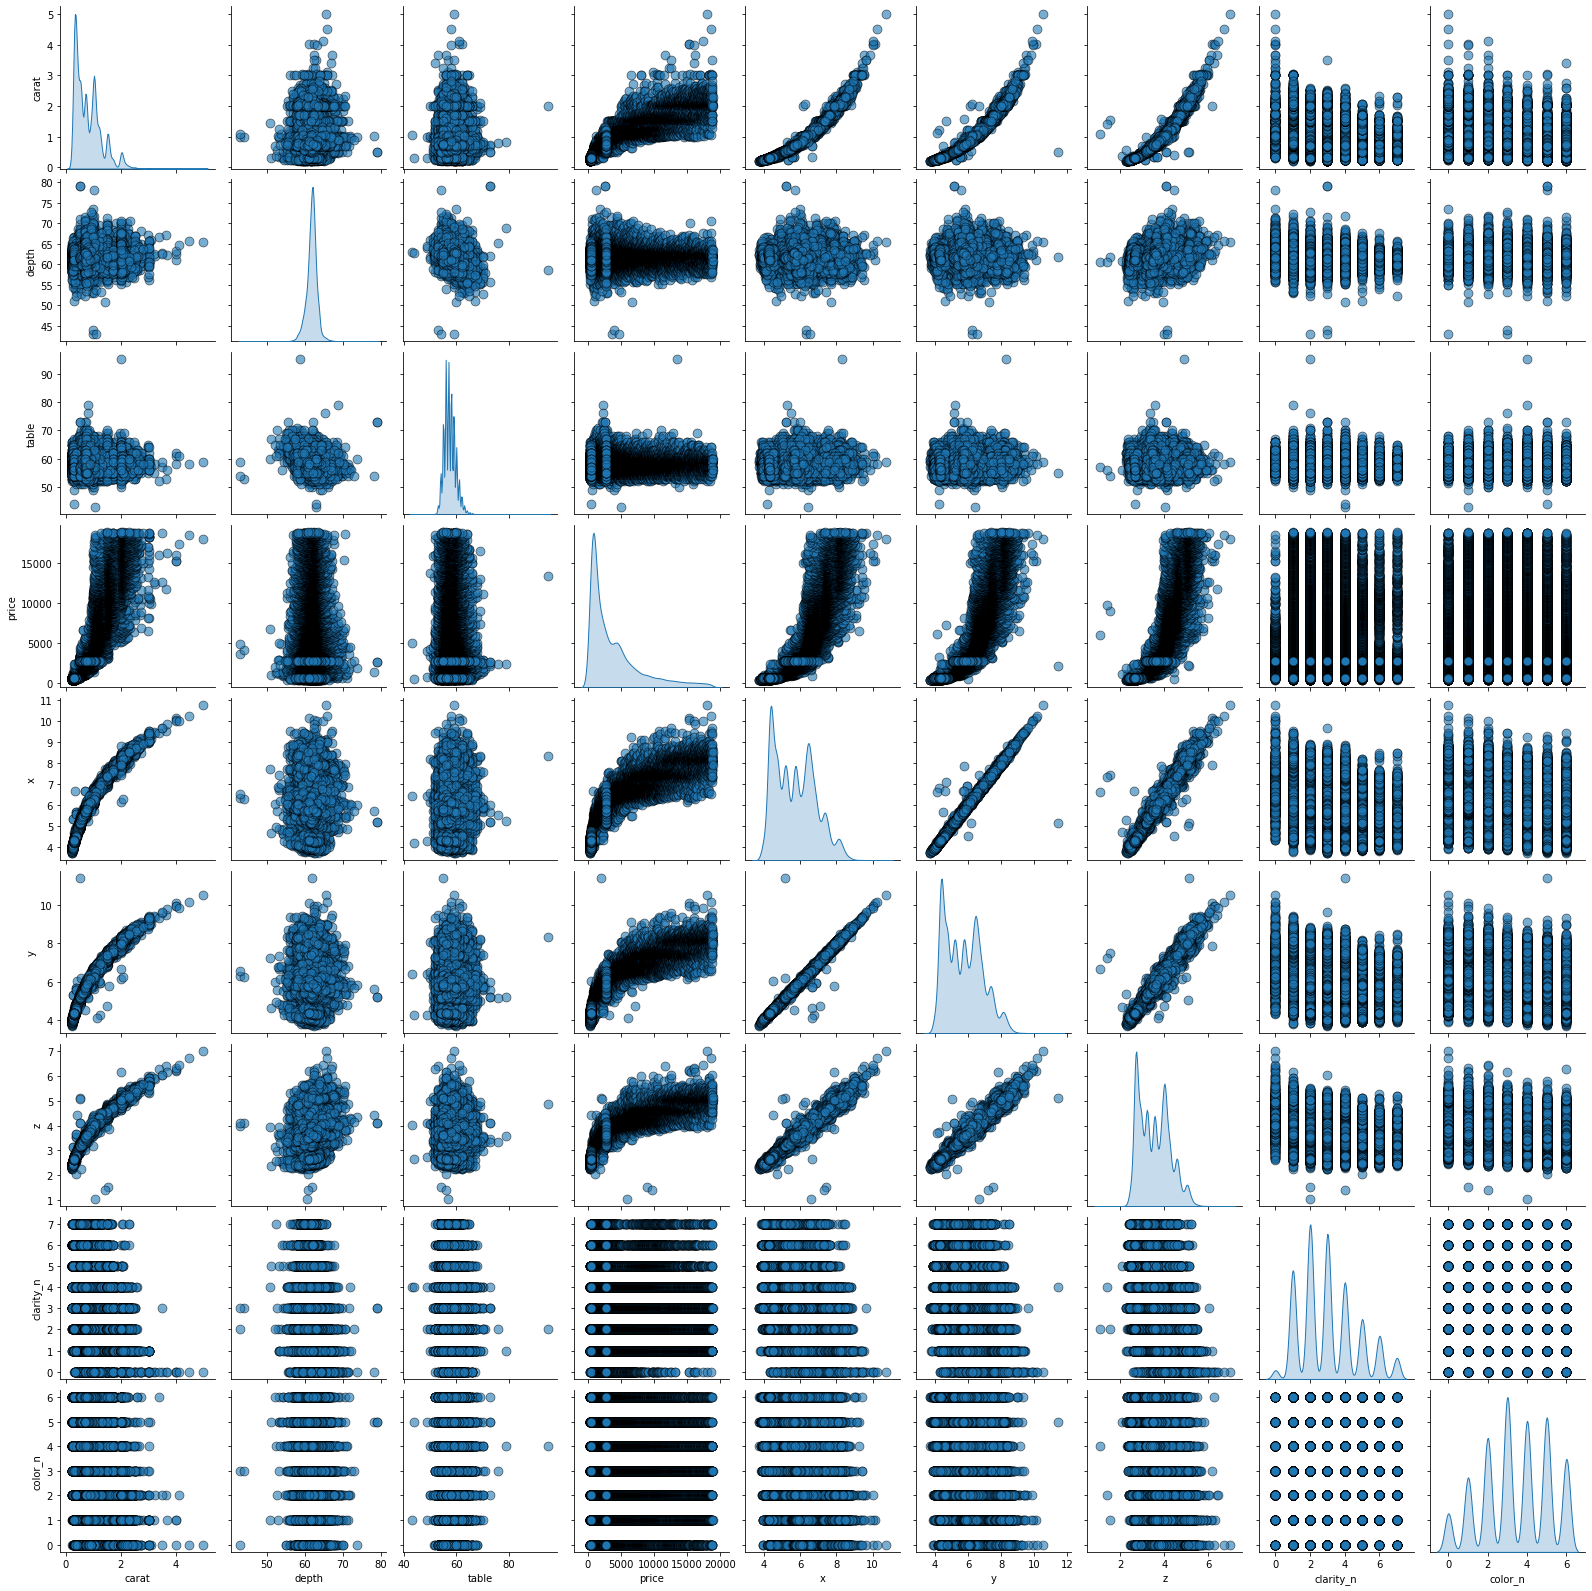

In [56]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
"""
Interestingly, x,y,z (i.e size features) are almost perfectly in linear correlation with carat, which
is logical. Therefore, these 3 features should show similar correlation with price as carat.
And indeed, they show the same graphic. 
Carat, x,y,z appear correlated to price: the bigger, the heavier, and the more expensive.
However, depth and table show no correlation: some diamonds share the same table or depth, but have totally different prices"""

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

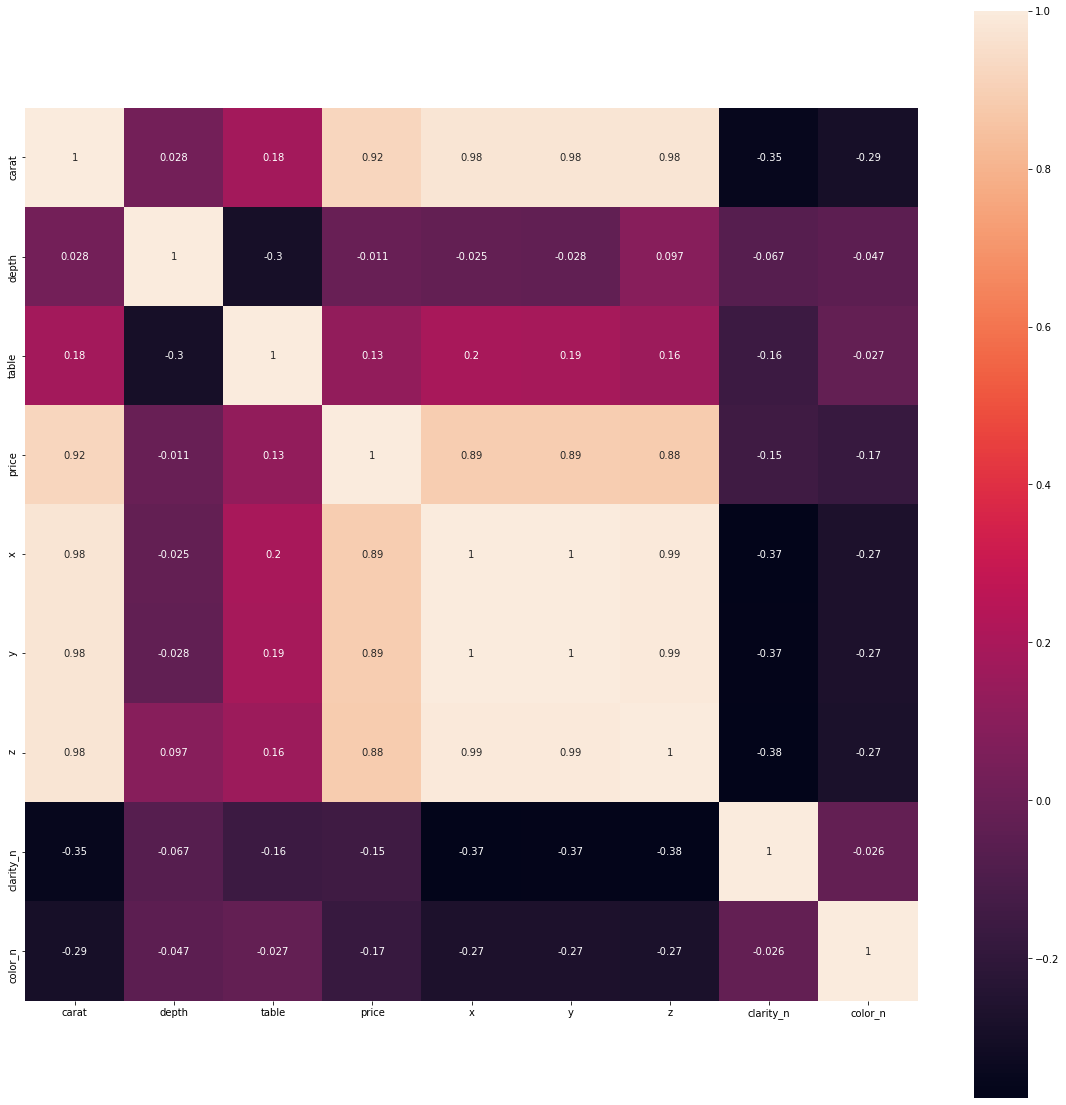

In [32]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)


**What do you see here? Regarding the results before, does it fit with them?**

In [27]:
#your thoughts here
"""It fits our results: price is highly correlated to carat, x, y and z (>0.8) wherease
color and clarity show a negligible negative correlation (-0.1)"""

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

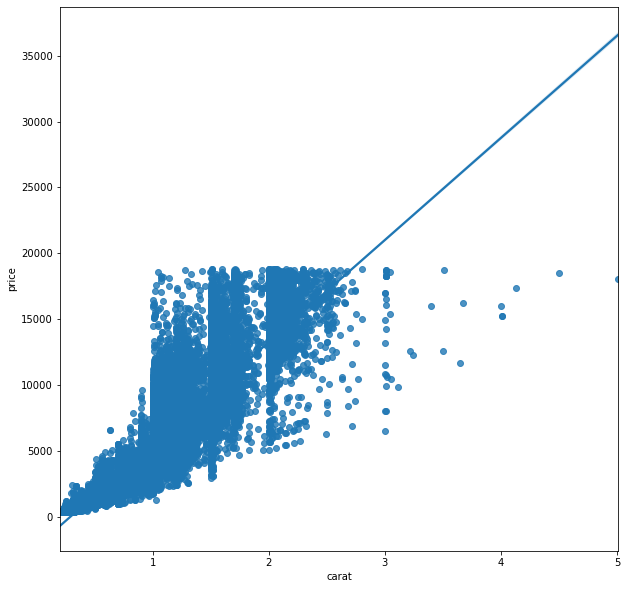

In [57]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [58]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493551426050154

**What do you think?**

In [30]:
#your thoughts here
"""Our r2 value is close enough to 1 to judge that our model is reliable"""

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

"""Carat (and obviously x y z) seems to be the sole relevant variable to guess/determine the price of a gem"""

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.